In [1]:
import pandas as pd
# path = 'C:\\Users\\Cara\\Desktop\\case.csv'
# rawdata = pd.read_csv(path,encoding = 'gbk')#字段名为中文，编码方式指定为gbk
data = pd.read_csv("house3.csv")
#print(data.head())#查看前几行数据
import numpy as np
import requests
from lxml import etree
from sklearn import preprocessing as prep
import random
import time
# import pandas as pd
# import numpy as np
import csv
import json
import math
import matplotlib as mpl
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib.mlab as mal
import seaborn as sns
# import pyecharts
# from pyecharts.charts import Map, Geo
# from pyecharts import options as opts
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import LocalOutlierFactor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data.head()

,行政区,房屋面积,卧室,客厅,厕所,楼层相对位置,楼层,发布时长,每月租金,经度,纬度,1000米内最近地铁站距离,1000米内最近公交车站距离,1000米内购物中心数量,1000米内公司数量,1000米内公园数量,1000米内医院数量,房屋类型,是否朝南
0,徐汇,90.56,2,2,1,高楼层,7,4,12000,121.465427,31.206022,1,1,2,87,0,4,4,1
1,静安,223.47,4,2,3,高楼层,26,3,65000,121.481124,31.249035,1,1,14,86,2,3,4,1
2,宝山,60.06,1,1,1,高楼层,19,4,4700,121.442076,31.344595,1,1,1,96,5,2,4,1
3,浦东,54.87,1,2,1,高楼层,25,1,5200,121.562591,31.252661,2,1,3,89,2,2,4,1
4,青浦,120.91,3,2,2,低楼层,6,6,6000,121.155589,31.169113,1,1,1,71,0,0,4,1


In [3]:
##分类变量处理1，2，3，4---> x1 x2 x3 0-1
p = data.loc[:,("行政区","楼层相对位置","1000米内最近地铁站距离",
                     '1000米内最近公交车站距离', '房屋类型')]

p['房屋类型'] = p['房屋类型'].map(str)
p["1000米内最近地铁站距离"]=p["1000米内最近地铁站距离"].map(str)
p['1000米内最近公交车站距离']=p['1000米内最近公交车站距离'].map(str)
p = pd.get_dummies(p)

p2 = data.join(p)
p2 = p2.drop(["行政区","楼层相对位置","1000米内最近地铁站距离",
                     '1000米内最近公交车站距离','房屋类型',
                    ],axis = 1)

In [4]:
p.head()

,行政区_嘉定,行政区_奉贤,行政区_宝山,行政区_崇明,行政区_徐汇,行政区_普陀,行政区_杨浦,行政区_松江,行政区_浦东,行政区_虹口,...,楼层相对位置_高楼层,1000米内最近地铁站距离_1,1000米内最近地铁站距离_2,1000米内最近地铁站距离_3,1000米内最近公交车站距离_1,1000米内最近公交车站距离_2,1000米内最近公交车站距离_3,房屋类型_2,房屋类型_3,房屋类型_4
0,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [5]:
p2.columns

Index(['房屋面积', '卧室', '客厅', '厕所', '楼层', '发布时长', '每月租金', '经度', '纬度',
       '1000米内购物中心数量', '1000米内公司数量', '1000米内公园数量', '1000米内医院数量', '是否朝南',
       '行政区_嘉定', '行政区_奉贤', '行政区_宝山', '行政区_崇明', '行政区_徐汇', '行政区_普陀', '行政区_杨浦',
       '行政区_松江', '行政区_浦东', '行政区_虹口', '行政区_金山', '行政区_长宁', '行政区_闵行', '行政区_青浦',
       '行政区_静安', '行政区_黄浦', '楼层相对位置_中楼层', '楼层相对位置_低楼层', '楼层相对位置_高楼层',
       '1000米内最近地铁站距离_1', '1000米内最近地铁站距离_2', '1000米内最近地铁站距离_3',
       '1000米内最近公交车站距离_1', '1000米内最近公交车站距离_2', '1000米内最近公交车站距离_3', '房屋类型_2',
       '房屋类型_3', '房屋类型_4'],
      dtype='object')

In [6]:
p2 = p2.drop(["行政区_嘉定","楼层相对位置_中楼层","1000米内最近地铁站距离_1",
                     '1000米内最近公交车站距离_1','房屋类型_2',
                    ],axis = 1)

In [7]:
p2.columns

Index(['房屋面积', '卧室', '客厅', '厕所', '楼层', '发布时长', '每月租金', '经度', '纬度',
       '1000米内购物中心数量', '1000米内公司数量', '1000米内公园数量', '1000米内医院数量', '是否朝南',
       '行政区_奉贤', '行政区_宝山', '行政区_崇明', '行政区_徐汇', '行政区_普陀', '行政区_杨浦', '行政区_松江',
       '行政区_浦东', '行政区_虹口', '行政区_金山', '行政区_长宁', '行政区_闵行', '行政区_青浦', '行政区_静安',
       '行政区_黄浦', '楼层相对位置_低楼层', '楼层相对位置_高楼层', '1000米内最近地铁站距离_2',
       '1000米内最近地铁站距离_3', '1000米内最近公交车站距离_2', '1000米内最近公交车站距离_3', '房屋类型_3',
       '房屋类型_4'],
      dtype='object')

In [8]:
##标准化
for i in range(13):
    if i !=6:##不对因变量x标准化
        p2.iloc[:,i] = (p2.iloc[:,i]-p2.iloc[:,i].mean())/p2.iloc[:,i].std()

In [9]:
p2.head()

,房屋面积,卧室,客厅,厕所,楼层,发布时长,每月租金,经度,纬度,1000米内购物中心数量,...,行政区_静安,行政区_黄浦,楼层相对位置_低楼层,楼层相对位置_高楼层,1000米内最近地铁站距离_2,1000米内最近地铁站距离_3,1000米内最近公交车站距离_2,1000米内最近公交车站距离_3,房屋类型_3,房屋类型_4
0,0.117541,-0.049106,1.155323,-0.441203,-0.645004,0.208795,12000,0.247657,-0.080945,-0.367698,...,0,0,0,1,0,0,0,0,0,1
1,2.396893,2.095271,1.155323,2.831815,1.478485,-0.183972,65000,0.392746,0.388429,2.157123,...,1,0,0,1,0,0,0,0,0,1
2,-0.405521,-1.121295,-0.449738,-0.441203,0.696147,0.208795,4700,0.031827,1.431211,-0.578100,...,0,0,0,1,0,0,0,0,0,1
3,-0.494527,-1.121295,1.155323,-0.441203,1.366722,-0.969507,5200,1.145752,0.427993,-0.157296,...,0,0,0,1,1,0,0,0,0,1
4,0.638031,1.023082,1.155323,1.195306,-0.756767,0.994330,6000,-2.616202,-0.483709,-0.578100,...,0,0,1,0,0,0,0,0,0,1


In [10]:
p2.describe()

,房屋面积,卧室,客厅,厕所,楼层,发布时长,每月租金,经度,纬度,1000米内购物中心数量,...,行政区_静安,行政区_黄浦,楼层相对位置_低楼层,楼层相对位置_高楼层,1000米内最近地铁站距离_2,1000米内最近地铁站距离_3,1000米内最近公交车站距离_2,1000米内最近公交车站距离_3,房屋类型_3,房屋类型_4
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,1.213751e-15,4.714673e-16,-1.556977e-16,-5.853096e-17,-7.203127e-17,9.228174e-17,9082.987400,-3.516882e-12,-5.867140e-13,-1.219913e-16,...,0.087400,0.047800,0.281000,0.362600,0.388000,0.203800,0.007800,0.000800,0.001600,0.98480
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,14617.462792,1.000000e+00,1.000000e+00,1.000000e+00,...,0.282449,0.213364,0.449532,0.480799,0.487343,0.402862,0.087981,0.028276,0.039972,0.12236
min,-1.291468e+00,-1.121295e+00,-2.054799e+00,-2.077712e+00,-1.315580e+00,-9.695072e-01,1000.000000,-3.815095e+00,-5.324078e+00,-7.885018e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-5.817329e-01,-1.121295e+00,-4.497380e-01,-4.412028e-01,-7.567667e-01,-9.695072e-01,4800.000000,-4.428454e-01,-5.026867e-01,-5.781000e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,-2.179045e-01,-4.910624e-02,-4.497380e-01,-4.412028e-01,-5.332416e-01,-1.839723e-01,6200.000000,9.213446e-02,6.417176e-02,-3.676982e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
75%,2.451343e-01,1.023082e+00,1.155323e+00,-4.412028e-01,5.843841e-01,9.943301e-01,9100.000000,6.036381e-01,5.939546e-01,2.635072e-01,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,1.571406e+01,6.384026e+00,4.365444e+00,7.741341e+00,4.831362e+00,2.172633e+00,750000.000000,4.554695e+00,4.575896e+00,7.837972e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [10]:
train = p2.sample(frac = 0.7, random_state = 1629)  
test = p2.drop(train.index)  

In [12]:
train.head()

,房屋面积,卧室,客厅,厕所,楼层,发布时长,每月租金,经度,纬度,1000米内购物中心数量,...,行政区_静安,行政区_黄浦,楼层相对位置_低楼层,楼层相对位置_高楼层,1000米内最近地铁站距离_2,1000米内最近地铁站距离_3,1000米内最近公交车站距离_2,1000米内最近公交车站距离_3,房屋类型_3,房屋类型_4
2971,-0.115007,-0.049106,-0.449738,-0.441203,0.360859,0.994330,3200,-1.850384,-0.288300,-0.788502,...,0,0,0,1,0,1,0,0,0,1
2070,-0.439306,-0.049106,1.155323,-0.441203,-0.756767,0.994330,6100,1.760435,-0.077087,-0.578100,...,0,0,0,1,1,0,0,0,0,1
719,-0.509276,-0.049106,-2.054799,-0.441203,-0.868529,-0.183972,8500,0.134613,-0.080369,1.736320,...,0,0,0,0,0,0,0,0,0,1
4856,-0.242600,-1.121295,-0.449738,-0.441203,-0.086191,-0.969507,2600,-2.864967,-0.347379,-0.788502,...,0,0,0,1,0,1,0,0,0,1
3913,0.054088,-0.049106,1.155323,-0.441203,-0.756767,-0.969507,7300,1.694320,0.101406,-0.788502,...,0,0,0,1,0,0,0,0,0,1


In [13]:
test.head()

,房屋面积,卧室,客厅,厕所,楼层,发布时长,每月租金,经度,纬度,1000米内购物中心数量,...,行政区_静安,行政区_黄浦,楼层相对位置_低楼层,楼层相对位置_高楼层,1000米内最近地铁站距离_2,1000米内最近地铁站距离_3,1000米内最近公交车站距离_2,1000米内最近公交车站距离_3,房屋类型_3,房屋类型_4
2,-0.405521,-1.121295,-0.449738,-0.441203,0.696147,0.208795,4700,0.031827,1.431211,-0.578100,...,0,0,0,1,0,0,0,0,0,1
5,-0.732392,-1.121295,-0.449738,-0.441203,-1.092054,1.779865,4800,0.190308,0.764098,0.053105,...,1,0,1,0,0,0,0,0,0,1
14,0.089073,-0.049106,-0.449738,-0.441203,0.584384,-0.969507,4000,-2.743863,-0.588129,-0.578100,...,0,0,0,0,0,1,0,0,0,1
16,0.383017,-0.049106,1.155323,-0.441203,2.037298,-0.576740,11000,0.192296,-0.721358,-0.578100,...,0,0,0,0,1,0,0,0,0,1
19,-0.280672,-0.049106,-0.449738,-0.441203,0.584384,-0.969507,8500,0.087898,-0.171004,3.840338,...,0,0,0,1,1,0,0,0,0,1


In [11]:
#修改index
train.index=[i for i in range(train.shape[0])]
test.index=[i for i in range(test.shape[0])]
train_x = train.drop(['每月租金'],axis=1) 
train_y = train['每月租金']


In [11]:
train_x

,房屋面积,卧室,客厅,厕所,楼层,发布时长,经度,纬度,1000米内购物中心数量,1000米内公司数量,...,行政区_静安,行政区_黄浦,楼层相对位置_低楼层,楼层相对位置_高楼层,1000米内最近地铁站距离_2,1000米内最近地铁站距离_3,1000米内最近公交车站距离_2,1000米内最近公交车站距离_3,房屋类型_3,房屋类型_4
0,-0.115007,-0.049106,-0.449738,-0.441203,0.360859,0.994330,-1.850384,-0.288300,-0.788502,-2.058292,...,0,0,0,1,0,1,0,0,0,1
1,-0.439306,-0.049106,1.155323,-0.441203,-0.756767,0.994330,1.760435,-0.077087,-0.578100,0.346846,...,0,0,0,1,1,0,0,0,0,1
2,-0.509276,-0.049106,-2.054799,-0.441203,-0.868529,-0.183972,0.134613,-0.080369,1.736320,0.853191,...,0,0,0,0,0,0,0,0,0,1
3,-0.242600,-1.121295,-0.449738,-0.441203,-0.086191,-0.969507,-2.864967,-0.347379,-0.788502,1.486122,...,0,0,0,1,0,1,0,0,0,1
4,0.054088,-0.049106,1.155323,-0.441203,-0.756767,-0.969507,1.694320,0.101406,-0.788502,-0.961211,...,0,0,0,1,0,0,0,0,0,1
5,-0.631724,-0.049106,-0.449738,-0.441203,-0.756767,-0.969507,0.237639,1.214032,-0.788502,0.726605,...,1,0,0,1,0,1,0,0,0,1
6,-1.042113,-1.121295,-2.054799,-0.441203,0.584384,-0.969507,0.124963,-1.838985,-0.367698,-1.594142,...,0,0,0,1,0,0,0,0,0,1
7,-0.153594,-0.049106,-0.449738,-0.441203,2.484348,-0.969507,0.392276,1.137296,-0.788502,0.810996,...,0,0,0,0,1,0,0,0,0,1
8,1.164352,2.095271,1.155323,1.195306,2.819636,-0.576740,0.135638,0.259329,2.998731,0.220260,...,1,0,1,0,1,0,0,0,0,1
9,0.236560,-0.049106,1.155323,-0.441203,2.372585,-0.969507,0.083796,0.486854,-0.788502,0.937582,...,0,0,0,1,0,0,0,0,0,1


In [35]:
##决策树
max_depth_range=[int(x) for x in np.linspace(10,500,num=25)]
max_depth_range.append(None)
min_samples_split_range=[2,5,10]
min_samples_leaf_range=[1,2,4,8]

dt_hp_range={
                        'max_depth':max_depth_range,
                        'min_samples_split':min_samples_split_range,
                        'min_samples_leaf':min_samples_leaf_range
            }
dt_model_test_base=DecisionTreeRegressor()
dt_model_test_random=RandomizedSearchCV(estimator=dt_model_test_base,
                                        param_distributions=dt_hp_range,
                                        n_iter=200,
                                        n_jobs=-1,
                                        cv=3,
                                        verbose=1,
                                        random_state=1629
                                        )
dt_model_test_random.fit(train_x,train_y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 503 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'max_depth': [10, 30, 50, 71, 91, 112, 132, 152, 173, 193, 214, 234, 255, 275, 295, 316, 336, 357, 377, 397, 418, 438, 459, 479, 500, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 8]},
          pre_dispatch='2*n_jobs', random_state=1629, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [36]:
dt_model_test_random.fit(train_x,train_y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 585 out of 600 | elapsed:  1.1min remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'max_depth': [10, 30, 50, 71, 91, 112, 132, 152, 173, 193, 214, 234, 255, 275, 295, 316, 336, 357, 377, 397, 418, 438, 459, 479, 500, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 8]},
          pre_dispatch='2*n_jobs', random_state=1629, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [37]:
best_hp_now=dt_model_test_random.best_params_

In [38]:
best_hp_now

{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}

In [39]:
dt_hp_range_2={
                'max_depth':[None],
                'min_samples_leaf':[1,2,3],
                'min_samples_split':[9,10,11]
              }
dt_model_test_2_base=DecisionTreeRegressor()
dt_model_test_2_random=GridSearchCV(estimator=dt_model_test_2_base,
                                    param_grid=dt_hp_range_2,
                                    cv=3,
                                    verbose=1,
                                    n_jobs=-1)
dt_model_test_2_random.fit(train_x,train_y)

best_hp_now_2=dt_model_test_2_random.best_params_


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.2min finished


In [40]:
best_hp_now_2

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 11}

In [41]:
dt_hp_range_3={
                'max_depth':[None],
                'min_samples_leaf':[2],
                'min_samples_split':[11,12,13]
              }
dt_model_test_3_base=DecisionTreeRegressor()
dt_model_test_3_random=GridSearchCV(estimator=dt_model_test_3_base,
                                    param_grid=dt_hp_range_3,
                                    cv=3,
                                    verbose=1,
                                    n_jobs=-1)
dt_model_test_3_random.fit(train_x,train_y)

best_hp_now_3=dt_model_test_3_random.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   44.9s remaining:   56.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.3min finished


In [42]:
best_hp_now_3

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 12}

In [57]:
# dt_hp_range_4={
#                 'max_depth':[None],
#                 'min_samples_leaf':[2],
#                 'min_samples_split':[6,7,8]
#               }
# dt_model_test_4_base=DecisionTreeRegressor()
# dt_model_test_4_random=GridSearchCV(estimator=dt_model_test_4_base,
#                                     param_grid=dt_hp_range_4,
#                                     cv=3,
#                                     verbose=1,
#                                     n_jobs=-1)
# dt_model_test_4_random.fit(train_x,train_y)

# best_hp_now_4=dt_model_test_4_random.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   41.6s remaining:   52.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.1min finished


In [62]:
# best_hp_now_4

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 8}

In [43]:
dt=DecisionTreeRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=12)
dt.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [44]:
# Predict test set data
test_x = test.drop(['每月租金'],axis=1) 
test_y = test['每月租金']

pred_dt=dt.predict(test_x)

test_y = test_y/1000
pred_dt = pred_dt/1000

err_dt = pred_dt - test_y

MAE_dt = np.mean(abs(err_dt))
MAPE_dt = np.mean(abs((err_dt)/test_y))
MSE_dt = np.mean(err_dt**2)
r2_dt = 1 - sum(err_dt**2)/sum((test_y-np.mean(test_y))**2)

In [46]:
print(MAE_dt,MAPE_dt,MSE_dt,r2_dt)

2.7193421067340053 0.2517491649014975 293.4625425453038 0.3279400903706582


2971      3200
2070      6100
719       8500
4856      2600
3913      7300
2694      4500
2123      2200
3477      6500
2441     28000
2050     10500
4619      3500
1600      6800
2439     14000
4917      2100
3197     42000
373      12500
327      10000
4847      7500
557       6300
4709      5000
597       4300
4174     10000
1662     11500
1368      4500
3821     28000
2892      4000
318       3400
4593      8000
729      14300
1826      4100
         ...  
3475      6000
985      12000
3933      3600
694       7400
1919      9000
2841      5000
4681      6000
2283      5000
4555      6500
4530      9500
4067    160000
1032      5800
4694     26000
1615      7200
191      20800
238       5200
4008      5700
72        4800
2385      6000
3946     12000
3854      8300
2432      4800
4832      3600
4759     21000
3267      7500
25        7200
1515      3800
1144     10000
3654     26000
2523      5300
Name: 每月租金, Length: 3500, dtype: int64

In [45]:
####随机森林

n_estimators_range=[int(x) for x in np.linspace(start=100,stop=3000,num=200)]

max_features_range = ['auto','sqrt']
max_depth_range=[int(x) for x in np.linspace(10,500,num=50)]
max_depth_range.append(None)
min_samples_split_range=[2,5,10]
min_samples_leaf_range=[1,2,4,8]

random_forest_hp_range={'n_estimators':n_estimators_range
                        }
random_forest_model_test_base=RandomForestRegressor()
random_forest_model_test_random=RandomizedSearchCV(estimator=random_forest_model_test_base,
                                                   param_distributions=random_forest_hp_range,
                                                   n_iter=200,
                                                   n_jobs=-1,
                                                   cv=3,
                                                   verbose=1,
                                                   random_state=1629
                                                   )
random_forest_model_test_random.fit(train_x,train_y)

best_hp_now=random_forest_model_test_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 49.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 89.3min finished


In [46]:
best_hp_now

{'n_estimators': 318}

In [47]:
max_features_range=["auto", "sqrt"]
rf_hp_range_2={   
               'max_features':max_features_range,
               'max_depth':max_depth_range,
               'min_samples_leaf':min_samples_leaf_range,
               'min_samples_split':min_samples_split_range
               }
rf_model_test_2_base=RandomForestRegressor(n_estimators=318)
rf_model_test_2_random=RandomizedSearchCV(estimator=rf_model_test_2_base,
                                          param_distributions=rf_hp_range_2,
                                          n_iter=200,
                                          n_jobs=-1,
                                          cv=3,
                                          verbose=1,
                                          random_state=1629
                                          )
rf_model_test_2_random.fit(train_x,train_y)

best_hp_now_2=rf_model_test_2_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  8.9min finished


In [48]:
best_hp_now_2

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 290}

In [26]:
rf=RandomForestRegressor(n_estimators=318,max_depth=290,max_features='sqrt',
                         min_samples_leaf=1,min_samples_split=2,random_state=1629)
rf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=290,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=318, n_jobs=1,
           oob_score=False, random_state=1629, verbose=0, warm_start=False)

In [27]:
test_x = test.drop(['每月租金'],axis=1) 
test_y = test['每月租金']
pred_rf=rf.predict(test_x)

pred_rf = pred_rf/1000
test_y=test_y/1000
err_rf=pred_rf-test_y
MAE_rf = np.mean(abs(err_rf))
MAPE_rf = np.mean(abs((err_rf)/test_y))
MSE_rf = np.mean(err_rf**2)
r2_rf = 1 - sum(err_rf**2)/sum((test_y-np.mean(test_y))**2)

In [28]:
print(MAE_rf,MAPE_rf,MSE_rf,r2_rf)

2.279980932215231 0.21230389709844902 324.294287074755 0.25733217134133557


In [52]:
test

,房屋面积,卧室,客厅,厕所,楼层,发布时长,经度,纬度,1000米内购物中心数量,1000米内公司数量,...,行政区_静安,行政区_黄浦,楼层相对位置_低楼层,楼层相对位置_高楼层,1000米内最近地铁站距离_2,1000米内最近地铁站距离_3,1000米内最近公交车站距离_2,1000米内最近公交车站距离_3,房屋类型_3,房屋类型_4
0,-0.405521,-1.121295,-0.449738,-0.441203,0.696147,0.208795,0.031827,1.431211,-0.578100,0.642214,...,0,0,0,1,0,0,0,0,0,1
1,-0.732392,-1.121295,-0.449738,-0.441203,-1.092054,1.779865,0.190308,0.764098,0.053105,-0.075108,...,1,0,1,0,0,0,0,0,0,1
2,0.089073,-0.049106,-0.449738,-0.441203,0.584384,-0.969507,-2.743863,-0.588129,-0.578100,-0.497062,...,0,0,0,0,0,1,0,0,0,1
3,0.383017,-0.049106,1.155323,-0.441203,2.037298,-0.576740,0.192296,-0.721358,-0.578100,0.937582,...,0,0,0,0,1,0,0,0,0,1
4,-0.280672,-0.049106,-0.449738,-0.441203,0.584384,-0.969507,0.087898,-0.171004,3.840338,0.389042,...,0,0,0,1,1,0,0,0,0,1
5,0.693424,-0.049106,-0.449738,-0.441203,-0.197954,1.387098,-0.330126,-0.133974,-0.157296,0.431237,...,0,0,0,1,0,0,0,0,0,1
6,-0.924124,-1.121295,-2.054799,-0.441203,2.037298,-0.969507,-0.025636,0.220479,0.684311,0.726605,...,1,0,0,1,1,0,0,0,0,1
7,-0.475148,-1.121295,-0.449738,-0.441203,0.584384,-0.576740,-2.567126,-0.733433,-0.788502,-2.944395,...,0,0,0,0,0,1,0,0,0,1
8,-0.412209,-0.049106,-0.449738,-0.441203,0.360859,-0.969507,1.637644,0.785916,-0.578100,0.726605,...,0,0,0,0,0,0,0,0,0,1
9,-0.566898,-0.049106,-0.449738,-0.441203,-0.645004,-0.969507,0.433228,-0.006736,0.894713,-0.159499,...,0,1,0,0,0,0,0,0,0,1


In [54]:
train_y

0         3200
1         6100
2         8500
3         2600
4         7300
5         4500
6         2200
7         6500
8        28000
9        10500
10        3500
11        6800
12       14000
13        2100
14       42000
15       12500
16       10000
17        7500
18        6300
19        5000
20        4300
21       10000
22       11500
23        4500
24       28000
25        4000
26        3400
27        8000
28       14300
29        4100
         ...  
3470      6000
3471     12000
3472      3600
3473      7400
3474      9000
3475      5000
3476      6000
3477      5000
3478      6500
3479      9500
3480    160000
3481      5800
3482     26000
3483      7200
3484     20800
3485      5200
3486      5700
3487      4800
3488      6000
3489     12000
3490      8300
3491      4800
3492      3600
3493     21000
3494      7500
3495      7200
3496      3800
3497     10000
3498     26000
3499      5300
Name: 每月租金, Length: 3500, dtype: int64

In [57]:
pred_rf

array([ 4863.59014675,  5138.51886792,  4944.96855346, ...,
       19328.6163522 ,  7616.05870021,  3351.88679245])

In [58]:
test_y

0        4700
1        4800
2        4000
3       11000
4        8500
5       16000
6        5600
7        2600
8        6000
9        8800
10       5600
11       3200
12       6200
13       5500
14      10800
15       5900
16      10000
17       7200
18       7600
19       6200
20       5800
21       3300
22      25000
23       8200
24      25000
25       6500
26       5000
27       7000
28      58000
29       7300
        ...  
1470     5500
1471     6800
1472     7800
1473    23000
1474    10000
1475     2650
1476    11000
1477     6500
1478    55000
1479     3200
1480     5000
1481     2900
1482     3300
1483     4200
1484     7500
1485    15000
1486     4100
1487     4700
1488     9000
1489    11500
1490    37000
1491    10500
1492     5500
1493     4500
1494     5000
1495     7250
1496     4500
1497     6100
1498    15000
1499     2300
Name: 每月租金, Length: 1500, dtype: int64

In [43]:
err_rf

0        0.214397
1        0.329399
2        0.731826
3       -0.965121
4        1.320210
5       -3.006301
6        0.104320
7        0.610790
8        0.414453
9       -1.466550
10       1.271350
11       1.182790
12       0.716812
13       0.139550
14       1.457570
15      -0.472350
16       0.314517
17       0.537897
18      -1.243440
19       1.110850
20       0.330640
21       0.140038
22      -4.135700
23       0.040190
24      -2.536128
25       0.721720
26       0.624506
27      -0.762534
28       2.539600
29       0.017307
          ...    
1470     1.388400
1471    11.968824
1472     0.406312
1473    -1.841510
1474    -0.301950
1475     2.236505
1476    -1.463100
1477     1.707950
1478    14.036899
1479     0.285480
1480     0.180200
1481     1.020113
1482     0.032010
1483     0.065870
1484     1.627693
1485    -5.989410
1486     0.384070
1487    -0.419000
1488    -0.524290
1489    -1.454200
1490    17.665600
1491     1.398639
1492     1.057423
1493    -0.739150
1494     0

In [12]:
n_estimators_range=[int(x) for x in np.linspace(start=50,stop=3000,num=60)]
learning_rate_range=[x for x in np.linspace(0.01,1)]

max_features_range=['None','sqrt']

max_depth_range=[int(x) for x in np.linspace(20,500,num=25)]
max_depth_range.append(None)
min_samples_split_range=[2,5,10]
min_samples_leaf_range=[1,2,4,8]

ab_hp_range={'n_estimators':n_estimators_range,
             'learning_rate':learning_rate_range
            }
ab_model_test_base=AdaBoostRegressor()
ab_model_test_random=RandomizedSearchCV(estimator=ab_model_test_base,
                                        param_distributions=ab_hp_range,
                                        n_iter=200,
                                        n_jobs=-1,
                                        cv=3,
                                        verbose=1,
                                        random_state=1629
                                        )
ab_model_test_random.fit(train_x,train_y)

best_hp_now=ab_model_test_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  8.8min finished


In [13]:
best_hp_now

{'n_estimators': 50, 'learning_rate': 0.4140816326530612}

In [16]:
base_estimator_range = []
for mf in max_features_range:
    for md in max_depth_range:
        for msl in min_samples_leaf_range:
            for msp in min_samples_split_range:
                base_estimator_range.append(DecisionTreeRegressor(max_features = mf,
                                                                  max_depth = md,
                                                                  min_samples_leaf = msl,
                                                                  min_samples_split = msp))

ab_hp_range_2={
              'base_estimator':base_estimator_range
              }
ab_model_test_2_base=AdaBoostRegressor(n_estimators = 50,learning_rate=0.414)
ab_model_test_2_random=RandomizedSearchCV(estimator=ab_model_test_2_base,
                                          param_distributions=ab_hp_range_2,
                                          n_iter=200,
                                          n_jobs=-1,
                                          cv=3,
                                          verbose=1,
                                          random_state=1629
                                          )
ab_model_test_2_random.fit(train_x,train_y) 

best_hp_now_2=ab_model_test_2_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  6.3min finished


In [15]:
max_features_range=["auto",'sqrt']

In [17]:
best_hp_now_2

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=100, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')}

In [18]:
ab=AdaBoostRegressor(n_estimators=50,learning_rate = 0.414,
                     base_estimator=DecisionTreeRegressor(max_depth=100,max_features='auto',
                         min_samples_leaf=2,min_samples_split=10),random_state=1629)
ab.fit(train_x,train_y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=100, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.414, loss='linear', n_estimators=50,
         random_state=1629)

In [21]:
pred_ab=ab.predict(test_x)

pred_ab = pred_ab/1000
test_y=test_y/1000
err_ab=pred_ab-test_y

MAE_ab = np.mean(abs(err_ab))
MAPE_ab = np.mean(abs((err_ab)/test_y))
MSE_ab = np.mean(err_ab**2)
r2_ab = 1 - sum(err_ab**2)/sum((test_y-np.mean(test_y))**2)

In [20]:
test_x = test.drop(['每月租金'],axis=1) 
test_y = test['每月租金']

In [22]:
print(MAE_ab,MAPE_ab,MSE_ab,r2_ab)

2.1000257349206373 0.17751414301813428 282.67153206999564 0.3526526327685531


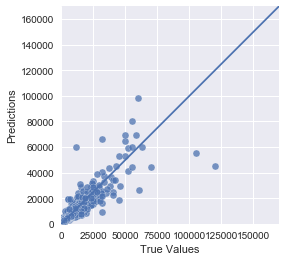

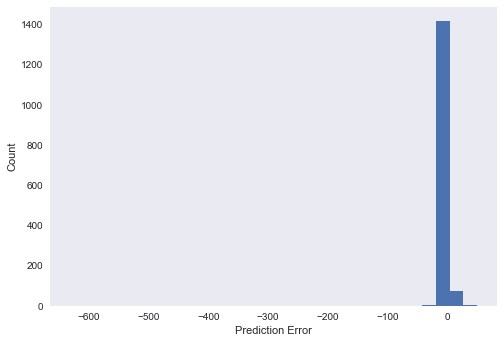

In [23]:
plt.figure(1)
plt.style.use('seaborn')
plt.grid(linestyle="-", alpha=0.5,linewidth=1.5)
plt.clf()
ax=plt.axes(aspect='equal')
plt.scatter(test_y*1000,pred_ab*1000,alpha=0.75,edgecolors= 'white')
plt.xlabel('True Values')
plt.ylabel('Predictions')
Lims=[0,170000]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims,Lims)
    
plt.figure(2)
plt.clf()
plt.hist(err_ab,bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.grid(False)


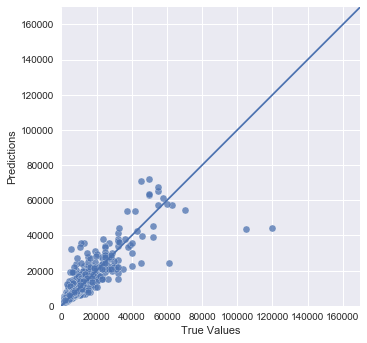

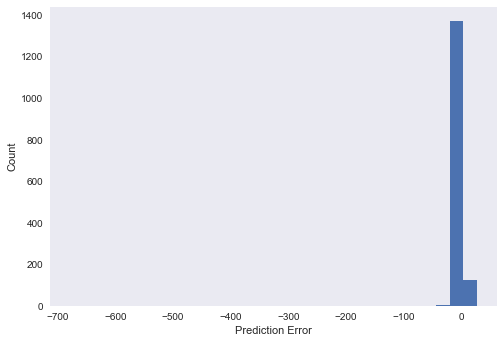

In [29]:
plt.figure(1)
plt.style.use('seaborn')
plt.grid(linestyle="-", alpha=0.5,linewidth=1.5)
plt.clf()
ax=plt.axes(aspect='equal')
plt.scatter(test_y*1000,pred_rf*1000,alpha=0.75,edgecolors= 'white')
plt.xlabel('True Values')
plt.ylabel('Predictions')
Lims=[0,170000]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims,Lims)
    
plt.figure(2)
plt.clf()
plt.hist(err_rf,bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.grid(False)

Text(0.5,1,'Variable Importances')

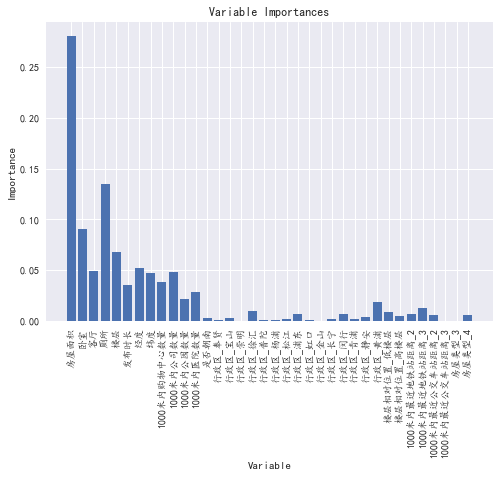

In [32]:
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False

random_forest_importance=list(rf.feature_importances_)
random_forest_feature_importance=[(feature,round(importance,8)) 
                                  for feature, importance in zip(train_x.columns,random_forest_importance)]
random_forest_feature_importance=sorted(random_forest_feature_importance,key=lambda x:x[1],reverse=True)
plt.figure(3)
plt.clf()
importance_plot_x_values=list(range(len(random_forest_importance)))
plt.bar(importance_plot_x_values,random_forest_importance,orientation='vertical')
plt.xticks(importance_plot_x_values,train_x.columns,rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')

Text(0.5,1,'Variable Importances')

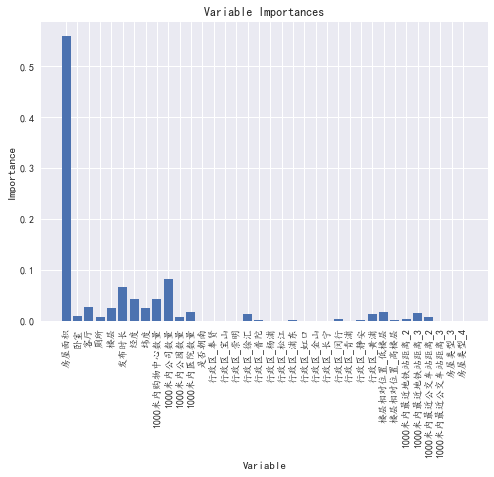

In [33]:
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False

ab_importance=list(ab.feature_importances_)
ab_feature_importance=[(feature,round(importance,8)) 
                                  for feature, importance in zip(train_x.columns,ab_importance)]
ab_feature_importance=sorted(ab_feature_importance,key=lambda x:x[1],reverse=True)
plt.figure(3)
plt.clf()
importance_plot_x_values=list(range(len(ab_importance)))
plt.bar(importance_plot_x_values,ab_importance,orientation='vertical')
plt.xticks(importance_plot_x_values,train_x.columns,rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')

TypeError: unhashable type: 'numpy.ndarray'

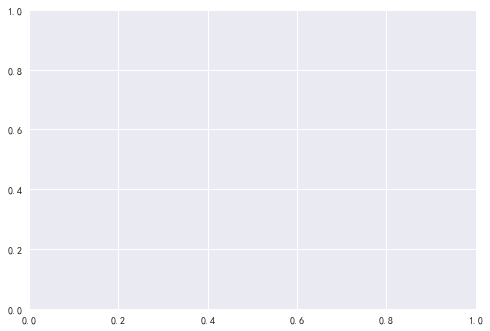

In [35]:
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False

random_forest_importance=list(rf.feature_importances_)
random_forest_feature_importance=[(feature,round(importance,8)) 
                                  for feature, importance in zip(train_x.columns,random_forest_importance)]
random_forest_feature_importance=sorted(random_forest_feature_importance,key=lambda x:x[1],reverse=True)
plt.figure(3)
plt.clf()
importance_plot_x_values=list(range(len(random_forest_importance)))
plt.bar(importance_plot_x_values,random_forest_importance,orientation='vertical')
plt.xticks(importance_plot_x_values,train_x.columns,rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')

In [36]:
random_forest_importance

[0.2802897160199795,
 0.09042868062603615,
 0.049557912653856735,
 0.13429253438858943,
 0.06755874065797582,
 0.03560965296920108,
 0.051924133976746695,
 0.04766685987542147,
 0.038615200264302395,
 0.048347244311127795,
 0.021329666228200556,
 0.028501395467075225,
 0.002444479755900657,
 0.0013134827440847785,
 0.0028966827099943505,
 4.713817734626582e-05,
 0.009549372967031868,
 0.0008393161471284443,
 0.0008261924198759702,
 0.0023697766086746277,
 0.006802295574667989,
 0.0005674243648524379,
 0.00010225708162551527,
 0.002020414216544872,
 0.006639291983833464,
 0.0020256910170737357,
 0.0036675369155841453,
 0.019066869338928802,
 0.008927435826481847,
 0.005132446470755032,
 0.006614985061277454,
 0.012554372642107047,
 0.005400541851174301,
 5.787246154609e-06,
 1.6613075647721795e-05,
 0.006047858364741418]

In [37]:
random_forest_feature_importance

[('房屋面积', 0.28028972),
 ('厕所', 0.13429253),
 ('卧室', 0.09042868),
 ('楼层', 0.06755874),
 ('经度', 0.05192413),
 ('客厅', 0.04955791),
 ('1000米内公司数量', 0.04834724),
 ('纬度', 0.04766686),
 ('1000米内购物中心数量', 0.0386152),
 ('发布时长', 0.03560965),
 ('1000米内医院数量', 0.0285014),
 ('1000米内公园数量', 0.02132967),
 ('行政区_黄浦', 0.01906687),
 ('1000米内最近地铁站距离_3', 0.01255437),
 ('行政区_徐汇', 0.00954937),
 ('楼层相对位置_低楼层', 0.00892744),
 ('行政区_浦东', 0.0068023),
 ('行政区_闵行', 0.00663929),
 ('1000米内最近地铁站距离_2', 0.00661499),
 ('房屋类型_4', 0.00604786),
 ('1000米内最近公交车站距离_2', 0.00540054),
 ('楼层相对位置_高楼层', 0.00513245),
 ('行政区_静安', 0.00366754),
 ('行政区_宝山', 0.00289668),
 ('是否朝南', 0.00244448),
 ('行政区_松江', 0.00236978),
 ('行政区_青浦', 0.00202569),
 ('行政区_长宁', 0.00202041),
 ('行政区_奉贤', 0.00131348),
 ('行政区_普陀', 0.00083932),
 ('行政区_杨浦', 0.00082619),
 ('行政区_虹口', 0.00056742),
 ('行政区_金山', 0.00010226),
 ('行政区_崇明', 4.714e-05),
 ('房屋类型_3', 1.661e-05),
 ('1000米内最近公交车站距离_3', 5.79e-06)]

In [38]:
random_forest_feature_importance

[('房屋面积', 0.28028972),
 ('厕所', 0.13429253),
 ('卧室', 0.09042868),
 ('楼层', 0.06755874),
 ('经度', 0.05192413),
 ('客厅', 0.04955791),
 ('1000米内公司数量', 0.04834724),
 ('纬度', 0.04766686),
 ('1000米内购物中心数量', 0.0386152),
 ('发布时长', 0.03560965),
 ('1000米内医院数量', 0.0285014),
 ('1000米内公园数量', 0.02132967),
 ('行政区_黄浦', 0.01906687),
 ('1000米内最近地铁站距离_3', 0.01255437),
 ('行政区_徐汇', 0.00954937),
 ('楼层相对位置_低楼层', 0.00892744),
 ('行政区_浦东', 0.0068023),
 ('行政区_闵行', 0.00663929),
 ('1000米内最近地铁站距离_2', 0.00661499),
 ('房屋类型_4', 0.00604786),
 ('1000米内最近公交车站距离_2', 0.00540054),
 ('楼层相对位置_高楼层', 0.00513245),
 ('行政区_静安', 0.00366754),
 ('行政区_宝山', 0.00289668),
 ('是否朝南', 0.00244448),
 ('行政区_松江', 0.00236978),
 ('行政区_青浦', 0.00202569),
 ('行政区_长宁', 0.00202041),
 ('行政区_奉贤', 0.00131348),
 ('行政区_普陀', 0.00083932),
 ('行政区_杨浦', 0.00082619),
 ('行政区_虹口', 0.00056742),
 ('行政区_金山', 0.00010226),
 ('行政区_崇明', 4.714e-05),
 ('房屋类型_3', 1.661e-05),
 ('1000米内最近公交车站距离_3', 5.79e-06)]

In [39]:
importance_plot_x_values

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35]

In [40]:
random_forest_feature_importance

[('房屋面积', 0.28028972),
 ('厕所', 0.13429253),
 ('卧室', 0.09042868),
 ('楼层', 0.06755874),
 ('经度', 0.05192413),
 ('客厅', 0.04955791),
 ('1000米内公司数量', 0.04834724),
 ('纬度', 0.04766686),
 ('1000米内购物中心数量', 0.0386152),
 ('发布时长', 0.03560965),
 ('1000米内医院数量', 0.0285014),
 ('1000米内公园数量', 0.02132967),
 ('行政区_黄浦', 0.01906687),
 ('1000米内最近地铁站距离_3', 0.01255437),
 ('行政区_徐汇', 0.00954937),
 ('楼层相对位置_低楼层', 0.00892744),
 ('行政区_浦东', 0.0068023),
 ('行政区_闵行', 0.00663929),
 ('1000米内最近地铁站距离_2', 0.00661499),
 ('房屋类型_4', 0.00604786),
 ('1000米内最近公交车站距离_2', 0.00540054),
 ('楼层相对位置_高楼层', 0.00513245),
 ('行政区_静安', 0.00366754),
 ('行政区_宝山', 0.00289668),
 ('是否朝南', 0.00244448),
 ('行政区_松江', 0.00236978),
 ('行政区_青浦', 0.00202569),
 ('行政区_长宁', 0.00202041),
 ('行政区_奉贤', 0.00131348),
 ('行政区_普陀', 0.00083932),
 ('行政区_杨浦', 0.00082619),
 ('行政区_虹口', 0.00056742),
 ('行政区_金山', 0.00010226),
 ('行政区_崇明', 4.714e-05),
 ('房屋类型_3', 1.661e-05),
 ('1000米内最近公交车站距离_3', 5.79e-06)]

In [42]:
c1=[i[0] for i in random_forest_feature_importance]

In [43]:
c2=[i[1] for  i in random_forest_feature_importance]

In [44]:
c2

[0.28028972,
 0.13429253,
 0.09042868,
 0.06755874,
 0.05192413,
 0.04955791,
 0.04834724,
 0.04766686,
 0.0386152,
 0.03560965,
 0.0285014,
 0.02132967,
 0.01906687,
 0.01255437,
 0.00954937,
 0.00892744,
 0.0068023,
 0.00663929,
 0.00661499,
 0.00604786,
 0.00540054,
 0.00513245,
 0.00366754,
 0.00289668,
 0.00244448,
 0.00236978,
 0.00202569,
 0.00202041,
 0.00131348,
 0.00083932,
 0.00082619,
 0.00056742,
 0.00010226,
 4.714e-05,
 1.661e-05,
 5.79e-06]

Text(0.5,1,'Variable Importances')

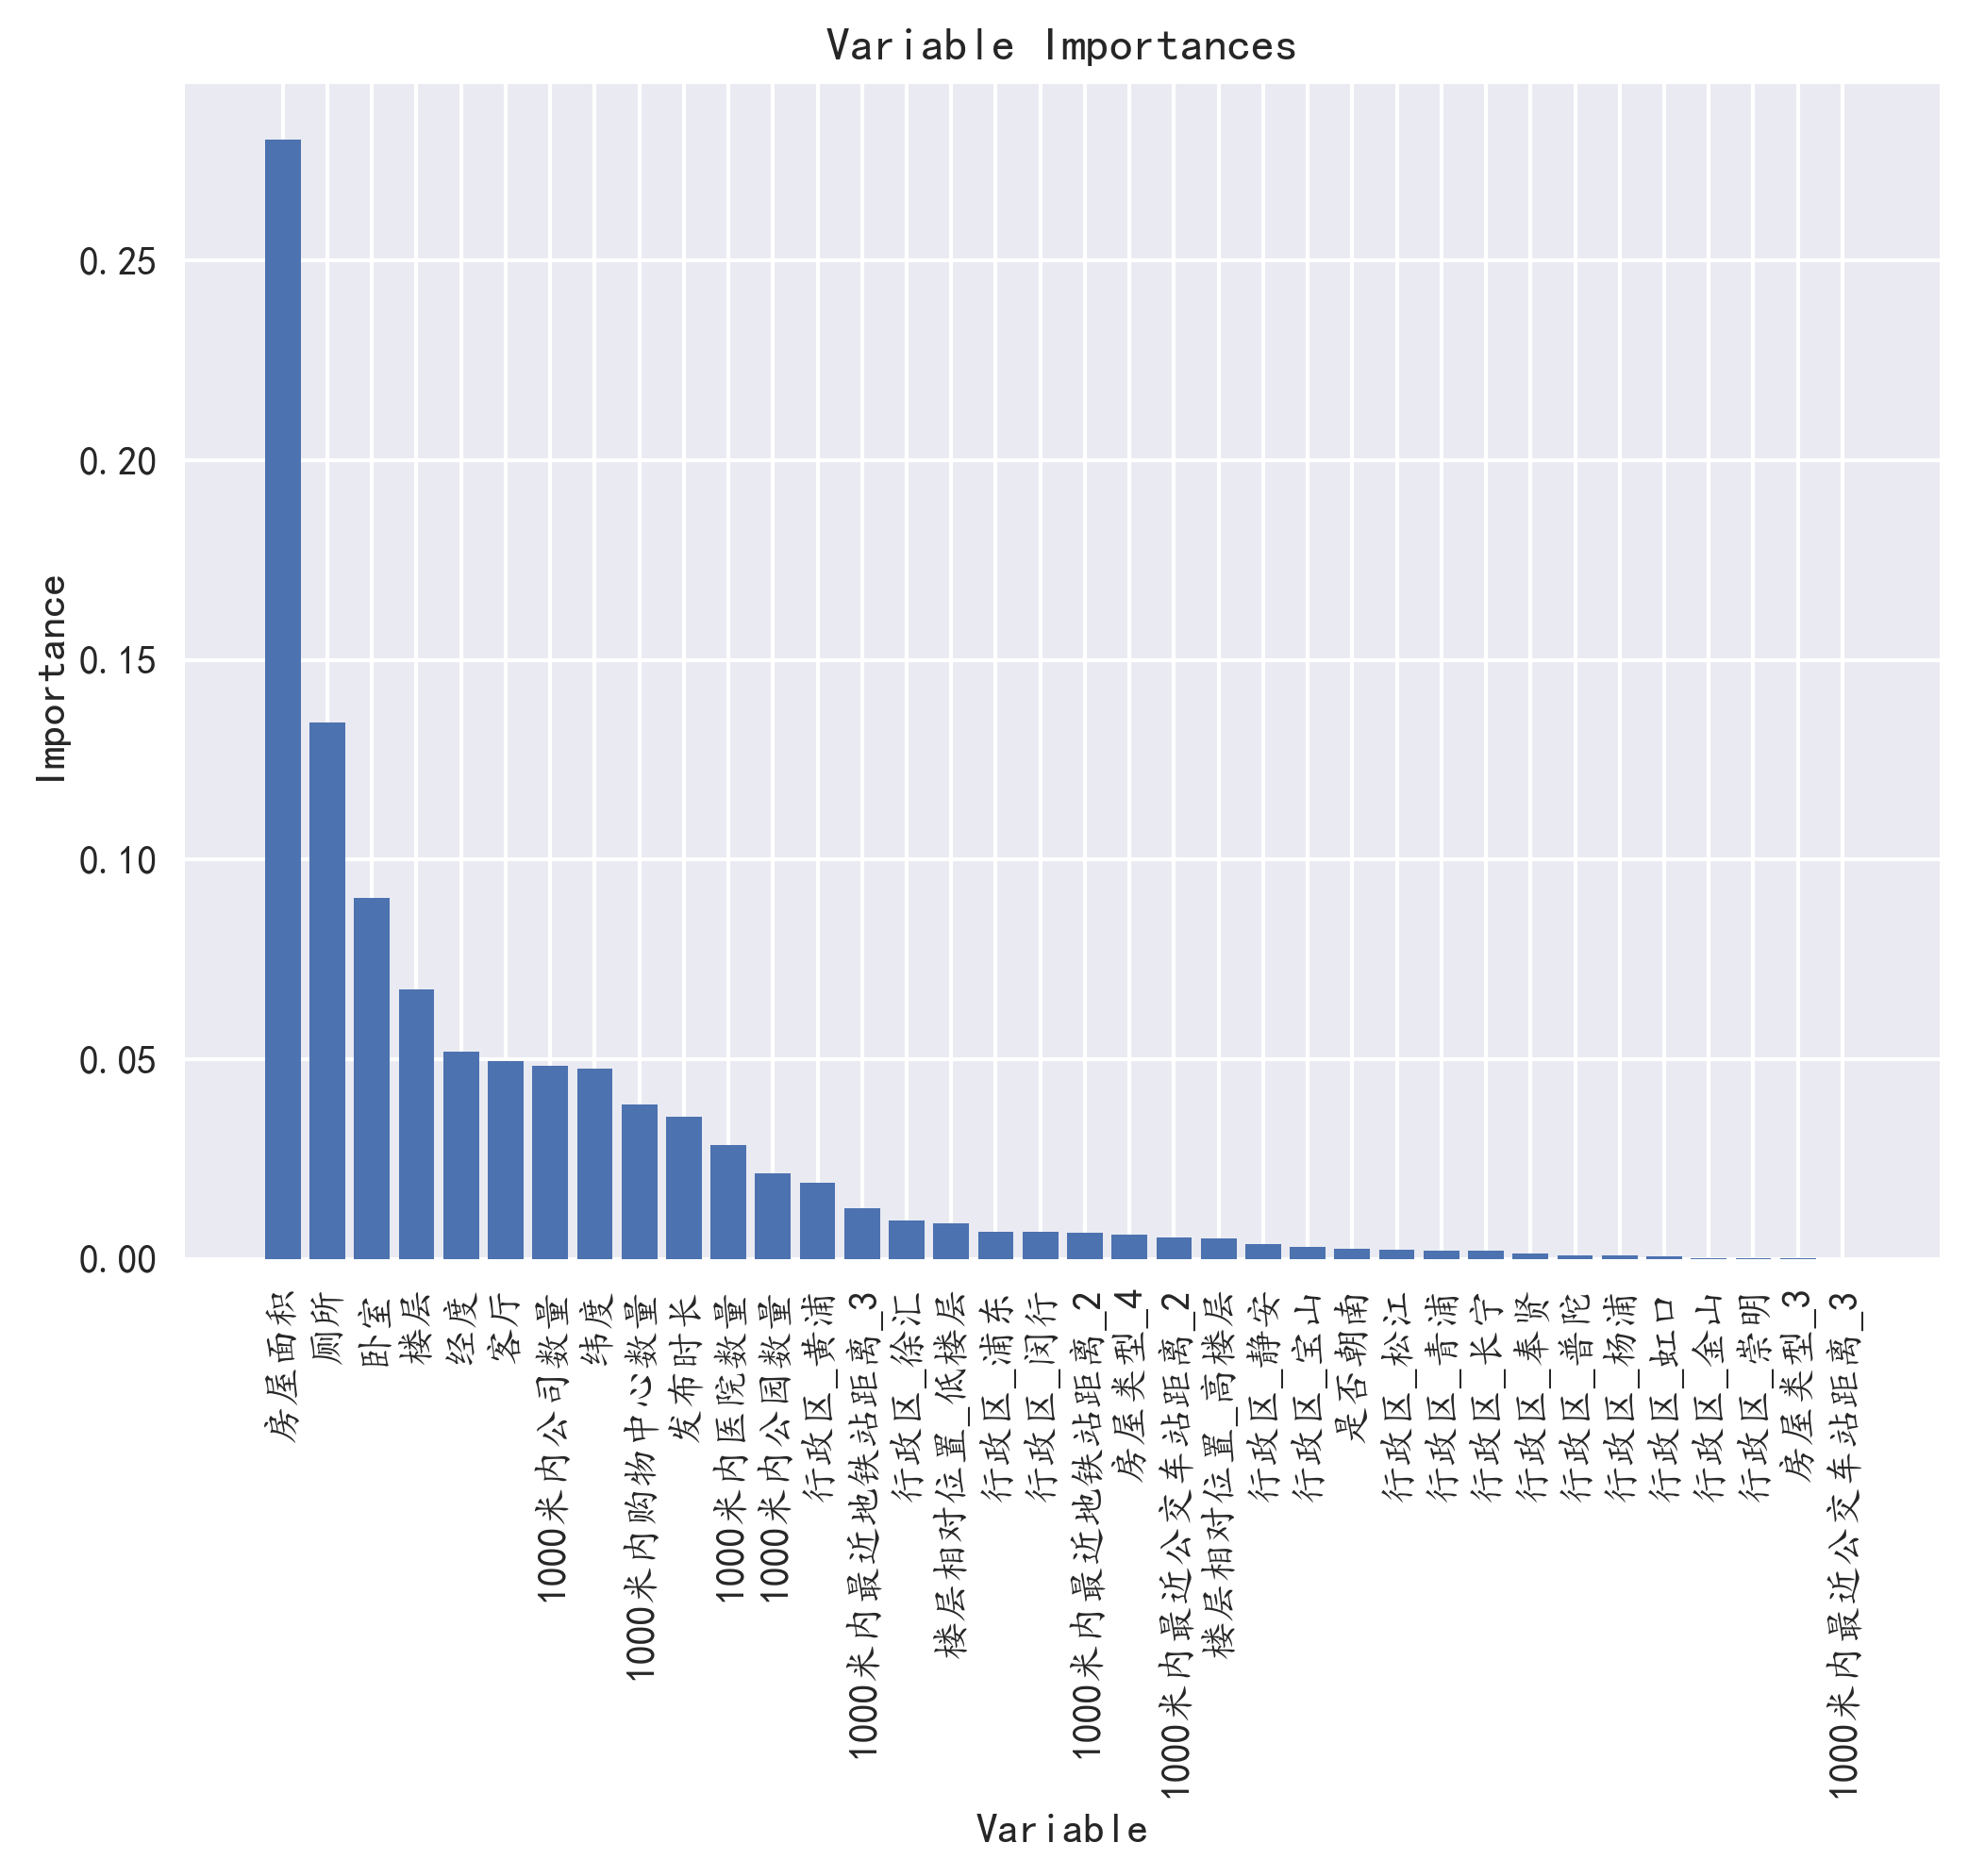

In [46]:

plt.figure(dpi=300)
plt.bar(importance_plot_x_values,c2,orientation='vertical')
plt.xticks(importance_plot_x_values,c1,rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')

Text(0.5,1,'Variable Importances')

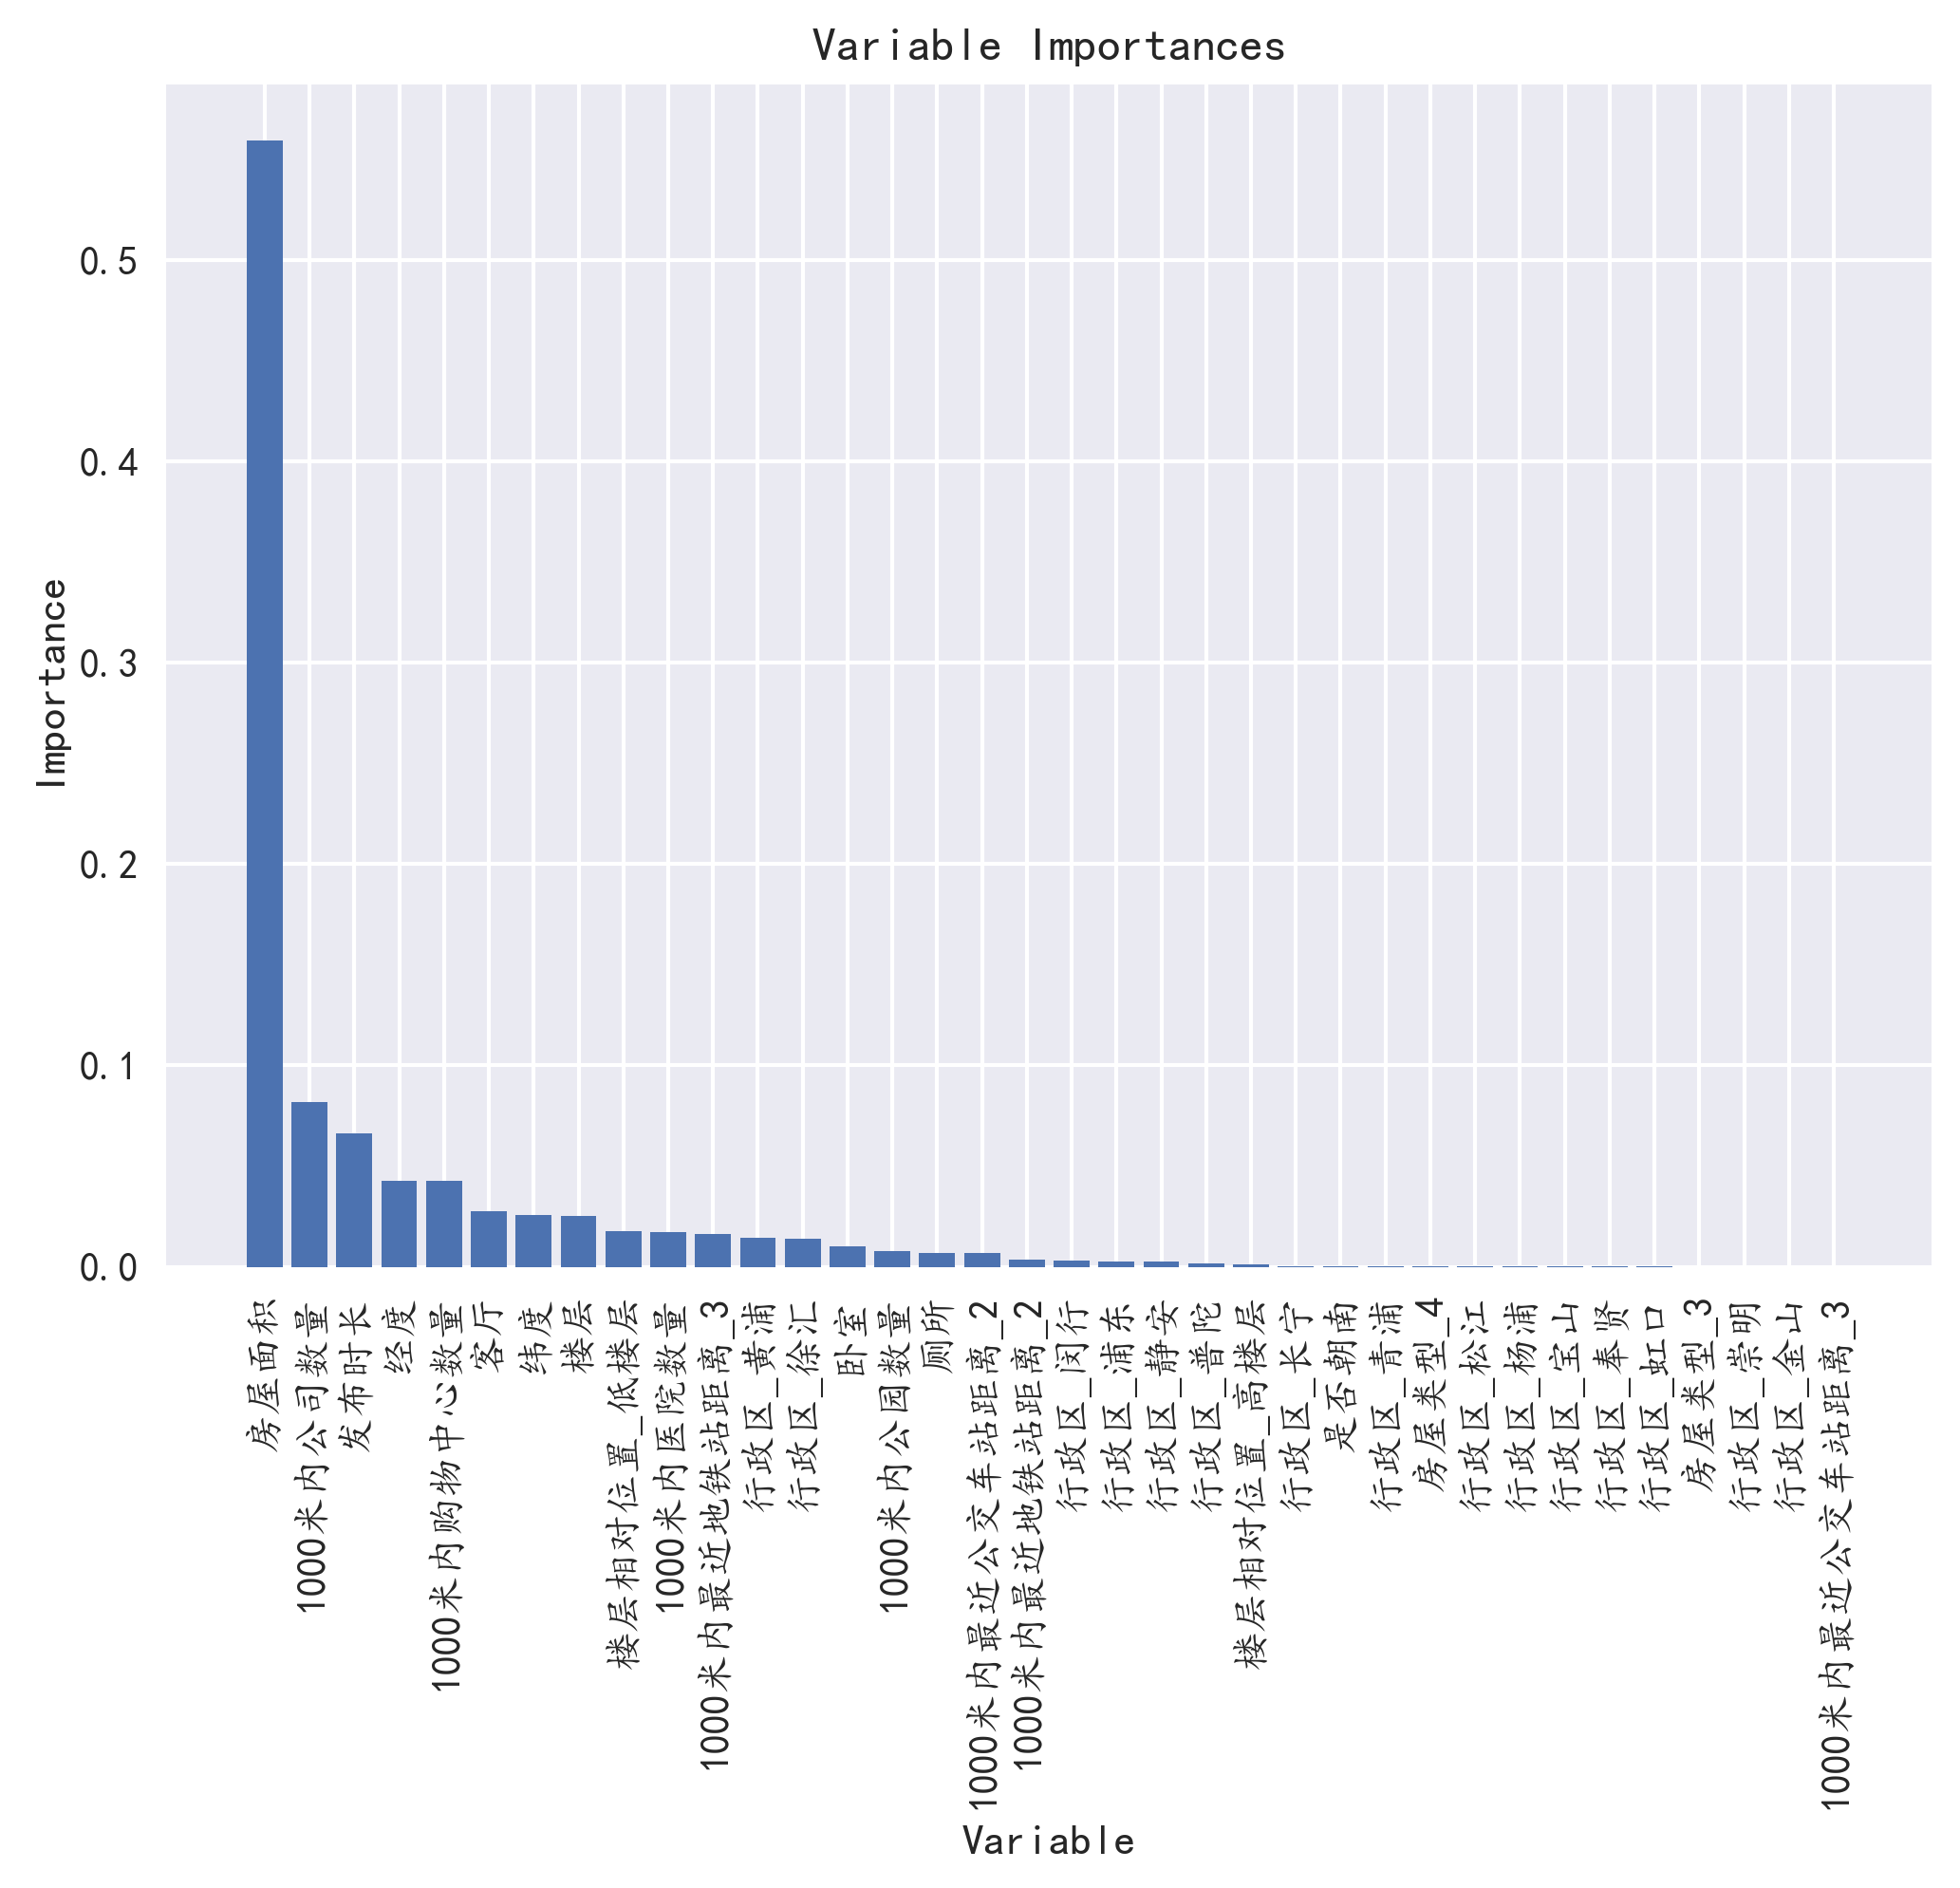

In [47]:

ab_importance=list(ab.feature_importances_)
ab_feature_importance=[(feature,round(importance,8)) 
                                  for feature, importance in zip(train_x.columns,ab_importance)]
ab_feature_importance=sorted(ab_feature_importance,key=lambda x:x[1],reverse=True)

c1=[i[0] for i in ab_feature_importance]
c2=[i[1] for  i in ab_feature_importance]
plt.figure(dpi=300)
importance_plot_x_values=list(range(len(ab_importance)))
plt.bar(importance_plot_x_values,c2,orientation='vertical')
plt.xticks(importance_plot_x_values,c1,rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')